# TP 2.1: Un peu de probabilités

## 1. Autour de la loi normale

La fonction `rnorm()` permet de générer des observations indépendantes d'une loi normale. Par défaut, la moyenne de cette loi est nulle et la variance vaut 1.

In [9]:
set.seed(123) # Fixe la graine pour la reproductibilité
# Génère un vecteur de 10 observations
vecteur_gaussien_10 <- rnorm(10)
vecteur_gaussien_10

[1] -0.56047565 -0.23017749  1.55870831  0.07050839  0.12928774  1.71506499
 [7]  0.46091621 -1.26506123 -0.68685285 -0.44566197

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Représenter l'histogramme des valeurs contenues dans <code>vecteur_gaussien_10</code> grâce à la fonction <code>hist()</code> en limitant l'axe des abscisses à $[-3,3]$.</li>
        <li>Effectuer les mêmes opérations en générant cette fois 100 observations dans un objet <code>vecteur_gaussien_100</code>. Commenter.</li>
        <li>Dans une matrice de taille $200 \times 10$, générer des observations d'une loi normale centrée réduite.</li>
        <li>Calculer les 200 moyennes des 200 échantillons donnés par les lignes de la matrice précédente. Stocker les résultats dans un objet <code>vecteur_moyen_10</code> et représenter l'histogramme de ces 200 moyennes en utilisant la même échelle que précédemment pour l'axe des abscisses.</li>
        <li>Calculer la moyenne et la variance des valeurs du vecteur <code>vecteur_moyen_10</code>. Ces résultats sont-ils cohérents avec les valeurs théoriques ?</li>
        <li>Effectuer les mêmes opérations avec des échantillons de 100 observations dans une matrice $200 \times 100$.</li>
    </ol>
</div>

moyenne des moyennes de 10 observations : 0.02085125 
var des moyennes de 10 observations : 0.003174042 


moyenne des moyennes de 100 observations : -0.009274177 
var des moyennes de 100 observations : 0.00423952 


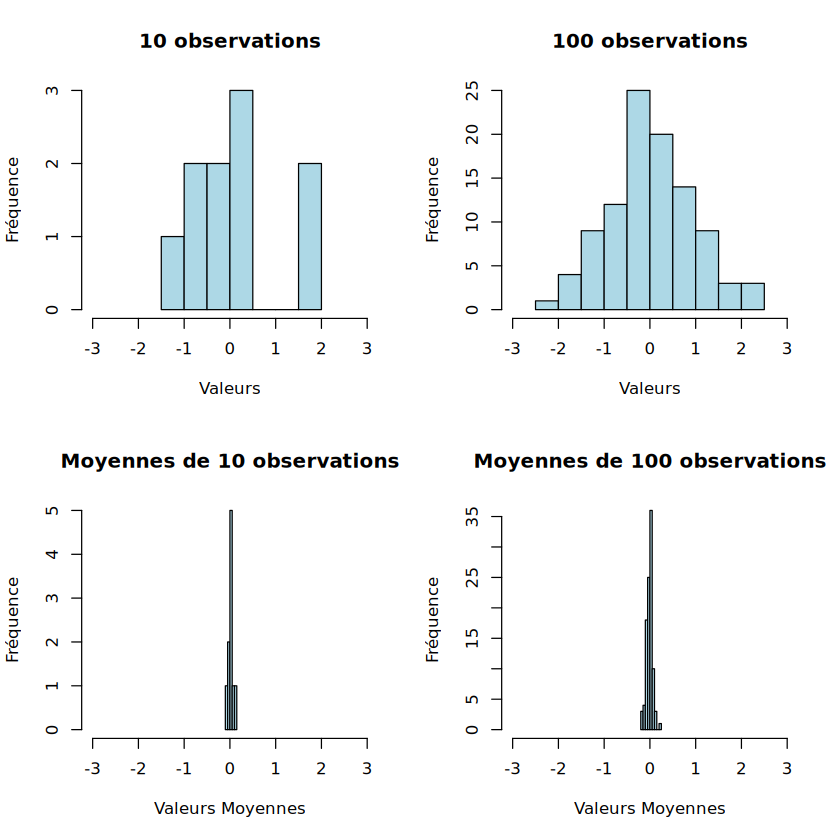

In [10]:
# À FAIRE
par(bg="white") # Définit le fond de la figure en blanc
par(mfrow=c(2,2)) # Définit une disposition 1x2 pour les graphiques
hist(vecteur_gaussien_10, main="10 observations", xlab="Valeurs", ylab="Fréquence", col="lightblue", border="black",xlim = 
     c(-3, 3))
vecteur_gaussien_100 <- rnorm(100)  
hist(vecteur_gaussien_100, main="100 observations", xlab="Valeurs", ylab="Fréquence", col="lightblue", border="black",xlim = 
     c(-3, 3))   
matrice_gaussien_10 <- matrix(rnorm(200 * 10), nrow = 200, ncol = 10)
vecteur_moyen_10 <- apply(matrice_gaussien_10,2, mean)

hist(vecteur_moyen_10, main="Moyennes de 10 observations", xlab="Valeurs Moyennes", ylab="Fréquence", col="lightblue", border="black",xlim = 
     c(-3, 3))
cat("moyenne des moyennes de 10 observations :", mean(vecteur_moyen_10), "\n")
cat("var des moyennes de 10 observations :", var(vecteur_moyen_10), "\n")
matrice_gaussien_100 <- matrix(rnorm(200 * 100), nrow = 200, ncol = 100)
vecteur_moyen_100 <- apply(matrice_gaussien_100,2, mean)

hist(vecteur_moyen_100, main="Moyennes de 100 observations", xlab="Valeurs Moyennes", ylab="Fréquence", col="lightblue", border="black",xlim = 
     c(-3, 3))
cat("moyenne des moyennes de 100 observations :", mean(vecteur_moyen_100), "\n")
cat("var des moyennes de 100 observations :", var(vecteur_moyen_100), "\n")
# À FAIRE
   


## 2. Vers la loi du $\chi^2$

Comme dans l'exercice précédent, nous générons 200 échantillons de 10 observations générées selon un loi normale centrée réduite.

In [11]:
matrice_200_10 <- matrix(rnorm(200*10), nrow=200)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>À partir de la matrice <code>matrice_200_10</code>, calculer le vecteur <code>vecteur_carre_10</code> de longueur 200 contenant la somme des carrés des valeurs de chacun des 200 échantillons de taille 10.</li>
        <li>Représenter l'histogramme de ces valeurs.</li>
        <li>Superposer la densité d'une loi de $\chi^2$ (fonction <code>dchisq()</code>)à 10 degrés de liberté.<br>
            <center><img src="img/chi2.png"></center></li>
    </ol>
</div>

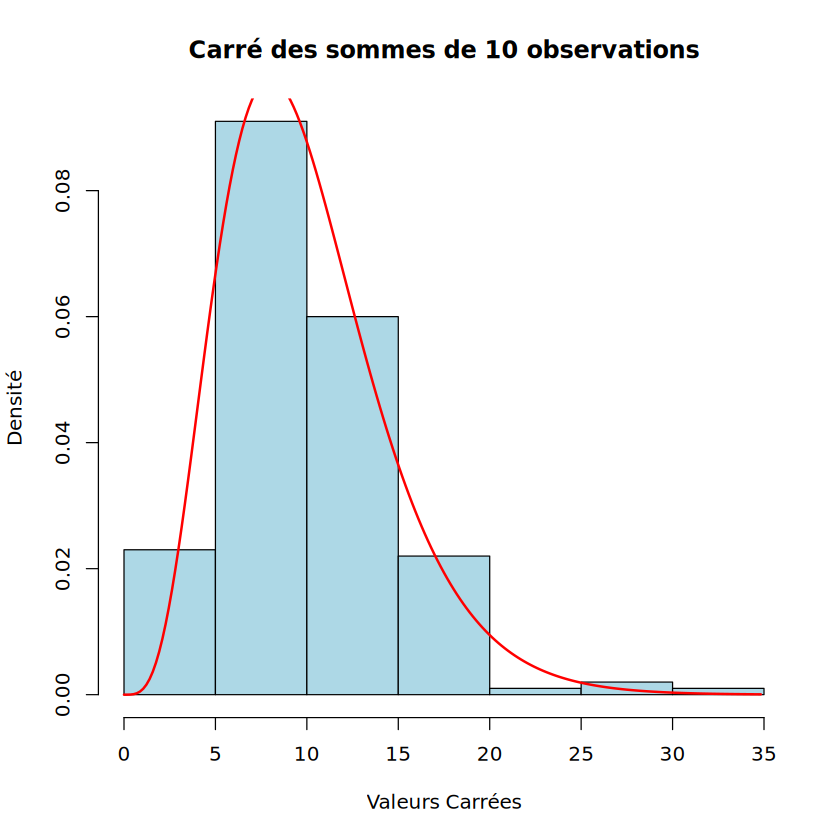

In [31]:
# À FAIRE
par(bg = 'white')  # Fond blanc

# Somme des carrés
vecteur_carre_10 <- apply(matrice_200_10,1 , function(x) sum(x^2))  
# Histogramme en densité
hist(vecteur_carre_10, 
     main = "Carré des sommes de 10 observations",
     xlab = "Valeurs Carrées",
     ylab = "Densité",
     col = "lightblue", border = "black",
     freq = FALSE)

# Courbe de densité du chi²(10)
x <- seq(0, max(vecteur_carre_10), length = 200)
lines(x,dchisq(x, df = 10), col = "red", lwd = 2)


## 3. Vers la loi de Fisher

Nous générons cette fois deux matrices remplies d'observations indépendantes de loi normale centrée réduite et de tailles respectives $200 \times 5$ et $200 \times 10$.

In [32]:
matrice_200_5 <- matrix(rnorm(200*5), nrow=200)
matrice_200_10 <- matrix(rnorm(200*10), nrow=200)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Comme dans l'exercice précédent, calculer les vecteurs <code>vecteur_carre_5</code> et <code>vecteur_carre_10</code> de longueur 200 contenant la somme des carrés des valeurs de chaque ligne des deux matrices.</li>
        <li>Calculer le vecteur <code>vecteur_rapport_5_10</code> obtenu par le rapport de <code>vecteur_carre_5</code> sur <code>vecteur_carre_10</code>.</li>
        <li>Représenter l'histogramme des 200 valeurs du vecteur <code>vecteur_rapport_5_10</code>.</li>
        <li>Superposer la densité d'une loi de Fisher (fonction <code>df()</code>)à 5 et 10 degrés de liberté.</li>
    </ol>
</div>

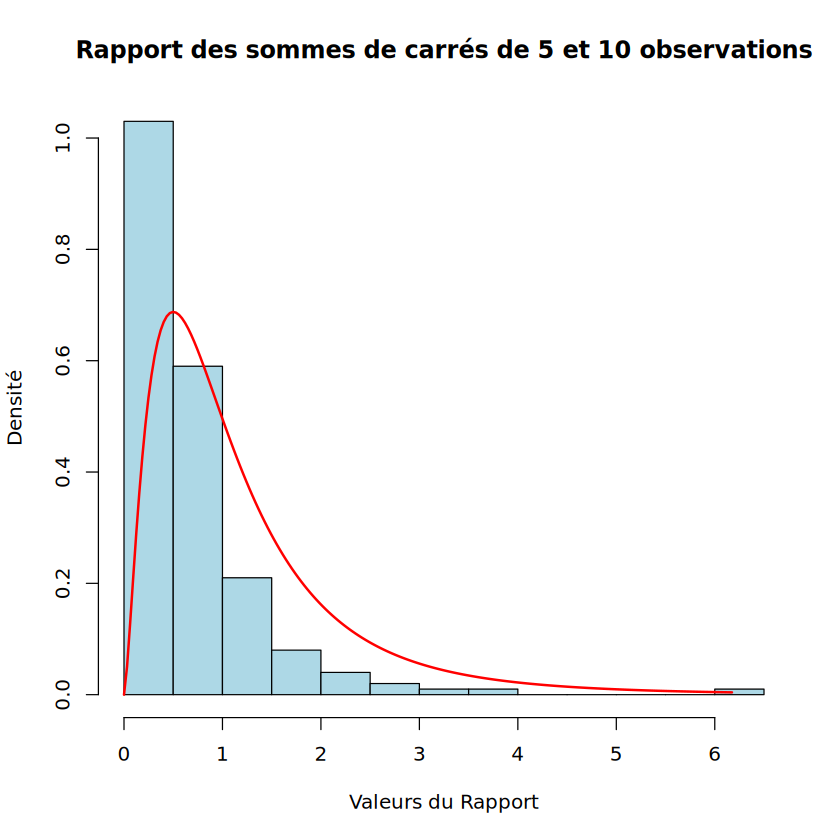

In [35]:
# À FAIRE
par(bg = 'white')  # Fond blanc
vecteur_carre_5 <- apply(matrice_200_5,1 , function(x) sum(x^2))  
vecteur_carre_10 <- apply(matrice_200_10,1 , function(x) sum(x^2))  
vecteur_rapport_5_10 <- vecteur_carre_5 / vecteur_carre_10
# Histogramme en densité
hist(vecteur_rapport_5_10, 
     main = "Rapport des sommes de carrés de 5 et 10 observations",
     xlab = "Valeurs du Rapport",
     ylab = "Densité",
     col = "lightblue", border = "black",
     freq = FALSE)
# Courbe de densité de la F(5,10)
x <- seq(0, max(vecteur_rapport_5_10), length = 200)
lines(x,df(x, df1 = 5, df2 = 10), col = "red", lwd = 2)